In [ ]:
def gen_hybrid_image(image1, image2, cutoff_frequency):
    """
     Inputs:
     - image1 -> The image from which to take the low frequencies.
     - image2 -> The image from which to take the high frequencies.
     - cutoff_frequency -> The standard deviation, in pixels, of the Gaussian
                           blur that will remove high frequencies.

     Task:
     - Use my_imfilter to create 'low_frequencies' and 'high_frequencies'.
     - Combine them to create 'hybrid_image'.
    """

    assert image1.shape[0] == image2.shape[0]
    assert image1.shape[1] == image2.shape[1]
    assert image1.shape[2] == image2.shape[2]

    # Steps:
    # (1) Remove the high frequencies from image1 by blurring it. The amount of
    #     blur that works best will vary with different image pairs
    # generate a 1x(2k+1) gaussian kernel with mean=0 and sigma = s, see https://stackoverflow.com/questions/17190649/how-to-obtain-a-gaussian-filter-in-python
    s, k = cutoff_frequency, cutoff_frequency*2
    probs = np.asarray([exp(-z * z / (2 * s * s)) / sqrt(2 * pi * s * s) for z in range(-k, k + 1)], dtype=np.float32)
    kernel = np.outer(probs, probs)

    # Your code here:
    low_frequencies = my_imfilter(image1, kernel)

    # (2) Remove the low frequencies from image2. The easiest way to do this is to
    #     subtract a blurred version of image2 from the original version of image2.
    #     This will give you an image centered at zero with negative values.
    # Your code here #
    high_frequencies = np.subtract(image2, my_imfilter(image2, kernel))

    # (3) Combine the high frequencies and low frequencies
    # Your code here #
    hybrid_image = np.add(high_frequencies, low_frequencies)

    # (4) At this point, you need to be aware that values larger than 1.0
    # or less than 0.0 may cause issues in the functions in Python for saving
    # images to disk. These are called in proj1_part2 after the call to 
    # gen_hybrid_image().
    # One option is to clip (also called clamp) all values below 0.0 to 0.0, 
    # and all values larger than 1.0 to 1.0.
    high_frequencies = np.clip(high_frequencies, 0.0, 1.0)
    hybrid_image = np.clip(hybrid_image, 0.0, 1.0)

    return low_frequencies, high_frequencies, hybrid_image

In [1]:
def my_imfilter(image, kernel):
    """
    Your function should meet the requirements laid out on the project webpage.
    Apply a filter (using kernel) to an image. Return the filtered image. To
    achieve acceptable runtimes, you MUST use numpy multiplication and summation
    when applying the kernel.
    Inputs
    - image: numpy nd-array of dim (m,n) or (m, n, c)
    - kernel: numpy nd-array of dim (k, l)
    Returns
    - filtered_image: numpy nd-array of dim of equal 2D size (m,n) or 3D size (m, n, c)
    Errors if:
    - filter/kernel has any even dimension -> raise an Exception with a suitable error message.
    """

    ##################
    # Your code here #
    ##################

    rotate_kernel = np.flip(kernel)

    kernel_row, kernel_col = rotate_kernel.shape

    if (kernel_row % 2 == 0) or (kernel_col % 2 == 0):
        raise Exception('Kernel is not of odd dimensions')

    color_channel = []
    num_channel = 1
    if len(image.shape) == 2:
        # grayscale image
        color_channel.append(image)
    elif len(image.shape) == 3:
        # RGB image
        num_channel = image.shape[2]
        for i in range(image.shape[2]):
            color_channel.append(image[:, :, i])
    else:
        return

    padding_row = kernel_row // 2
    padding_col = kernel_col // 2

    for i in range(num_channel):
        channel = color_channel[i]
        result = np.zeros(channel.shape, dtype=np.float32)
        channel_padded = np.pad(
            channel, [(padding_row, padding_row), (padding_col, padding_col)], mode='constant')
        for col in range(channel.shape[1]):
            for row in range(channel.shape[0]):
                result[row, col] = (
                        rotate_kernel * channel_padded[row: row + kernel_row, col: col + kernel_col]).sum()
        color_channel[i] = result

    if num_channel == 1:
        filtered_image = color_channel[0]
    else:
        filtered_image = np.stack(color_channel, axis=2)
    return filtered_image

/Users/huangrunxi/Documents/Projects/Image-Processing-and-Computer-Vision/Lab01/code/helpers.py:35: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  cur_image = rescale(cur_image, scale_factor, mode='reflect', multichannel=True)


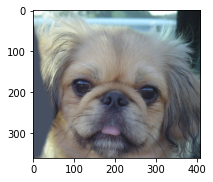

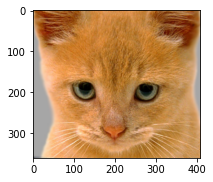

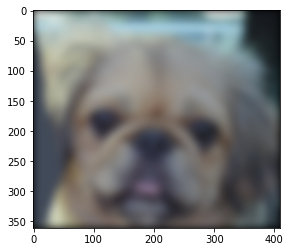

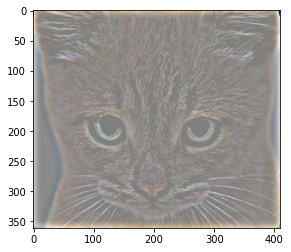

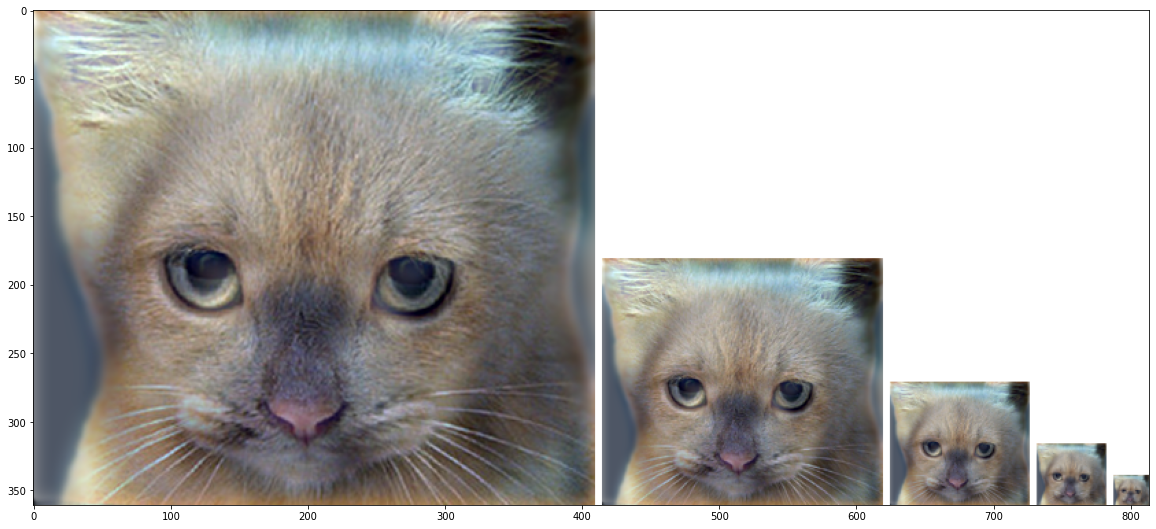

In [2]:
# Spring 2022: Image Processing and Computer Vision
# Beihang Univeristy
# Homework set 1
# Lu Sheng (lsheng@buaa.edu.cn)
#
# Generate Hybrid Image
#
# Based on previous and current work
# by James Hays for CSCI 1430 @ Brown and
# CS 4495/6476 @ Georgia Tech
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from helpers import vis_hybrid_image, load_image, save_image

from student import my_imfilter, gen_hybrid_image

# Before trying to construct hybrid images, it is suggested that you
# implement my_imfilter in student.py and then debug it using proj1_part1.py

# Debugging tip: You can split your python code and print in between
# to check if the current states of variables are expected.

# Setup
# Read images and convert to floating point format
image1 = load_image('../data/3-dog.bmp')
image2 = load_image('../data/3-cat.bmp')

# display the dog and cat images
plt.figure(figsize=(3, 3))
plt.imshow((image1*255).astype(np.uint8))
plt.figure(figsize=(3, 3))
plt.imshow((image2*255).astype(np.uint8))

# For your write up, there are several additional test cases in 'data'.
# Feel free to make your own, too (you'll need to align the images in a
# photo editor such as Photoshop).
# The hybrid images will differ depending on which image you
# assign as image1 (which will provide the low frequencies) and which image
# you asign as image2 (which will provide the high frequencies)

## Hybrid Image Construction ##
# cutoff_frequency is the standard deviation, in pixels, of the Gaussian
# blur that will remove high frequencies. You may tune this per image pair
# to achieve better results.
cutoff_frequency = 7
low_frequencies, high_frequencies, hybrid_image = gen_hybrid_image(
    image1, image2, cutoff_frequency)

## Visualize and save outputs ##
plt.figure()
plt.imshow((low_frequencies*255).astype(np.uint8))
plt.figure()
plt.imshow(((high_frequencies+0.5)*255).astype(np.uint8))
vis = vis_hybrid_image(hybrid_image)
plt.figure(figsize=(20, 20))
plt.imshow(vis)

save_image('../results/low_frequencies.jpg', low_frequencies)
outHigh = np.clip(high_frequencies + 0.5, 0.0, 1.0)
save_image('../results/high_frequencies.jpg', outHigh)
save_image('../results/hybrid_image.jpg', hybrid_image)
save_image('../results/hybrid_image_scales.jpg', vis)
